# CLASSIFICATION USING ANN AND SVM

In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# from jcopml library
from jcopml.plot import plot_missing_value

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
data = pd.read_csv('Churn_Dataset.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [104]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,missing_value,%
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


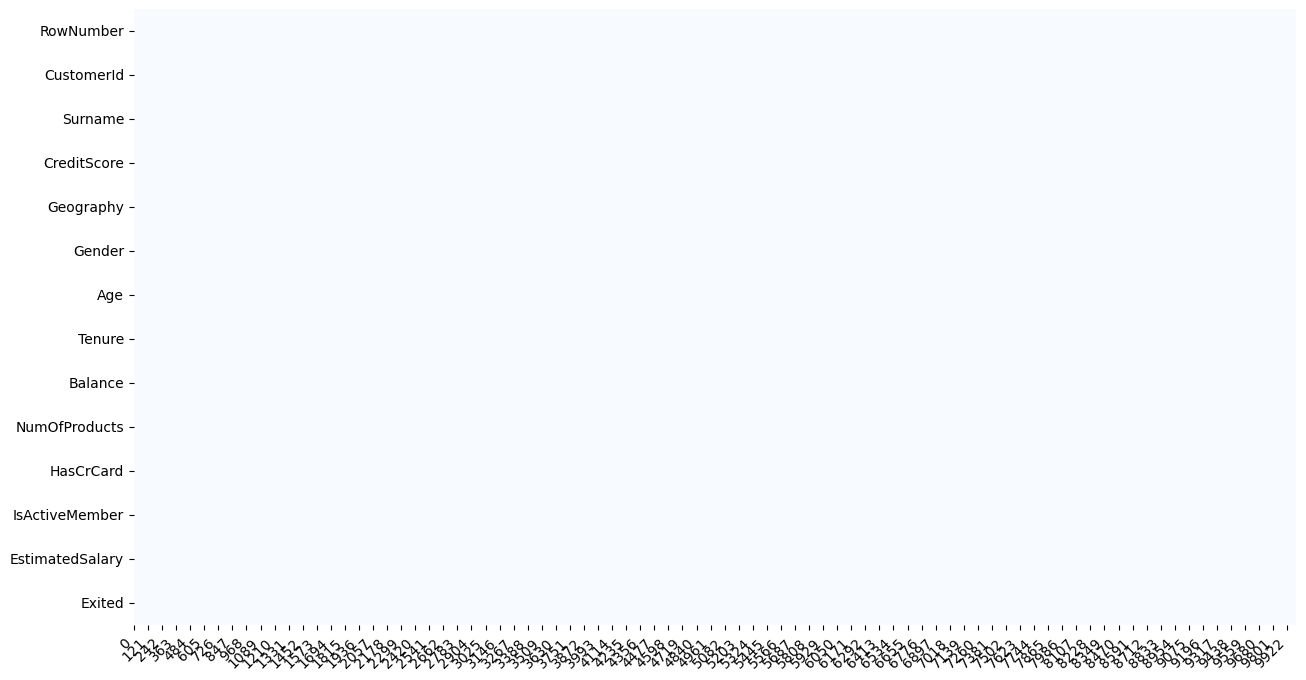

In [105]:
# Checking if our dataset contains any NULL values

plot_missing_value(data, return_df=True)

# DATA PREPROCESSING

In [106]:
# Removing the unnecassary features from the dataset
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [107]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding with pandas 

data = pd.get_dummies(data, columns=['Gender', 'Geography'], prefix=['Gender', 'Geography'])

data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [108]:
# splitting the data into training and testing set
x = data.drop(['Exited'], axis=1)
y = data['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train.columns)

(9000, 13) (1000, 13) (9000,) (1000,)
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [109]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

scale =StandardScaler()

x_train = scale.fit_transform(x_train)
x_test= scale.transform(x_test)

# LOGISTIC REGRESSION

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8102222222222222
Testing Accuracy : 0.809
[[772  37]
 [154  37]]


# SUPPORT  VECTOR MACHINE

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8643333333333333
Testing Accuracy : 0.863
[[789  20]
 [117  74]]


In [112]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.84888889 0.85777778 0.85888889 0.84888889 0.84111111 0.85555556
 0.86888889 0.84777778 0.85777778 0.84888889]


# MULTILAYER ANN

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Initialising ANN

# define the keras model
model = Sequential()
model.add(Dense(6, input_shape=(13,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=10)

Epoch 1/50
900/900 [==============================] - 2s 1ms/step - loss: 0.1616 - accuracy: 0.7949 - val_loss: 0.1384 - val_accuracy: 0.8090
Epoch 2/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1400 - accuracy: 0.8018 - val_loss: 0.1298 - val_accuracy: 0.8240
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1320 - accuracy: 0.8133 - val_loss: 0.1262 - val_accuracy: 0.8230
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1273 - accuracy: 0.8224 - val_loss: 0.1242 - val_accuracy: 0.8260
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1235 - accuracy: 0.8342 - val_loss: 0.1207 - val_accuracy: 0.8390
Epoch 6/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1164 - accuracy: 0.8482 - val_loss: 0.1140 - val_accuracy: 0.8480
Epoch 7/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.8583 - val_loss: 0.1081 - val_accuracy: 0.8540
Epoch 

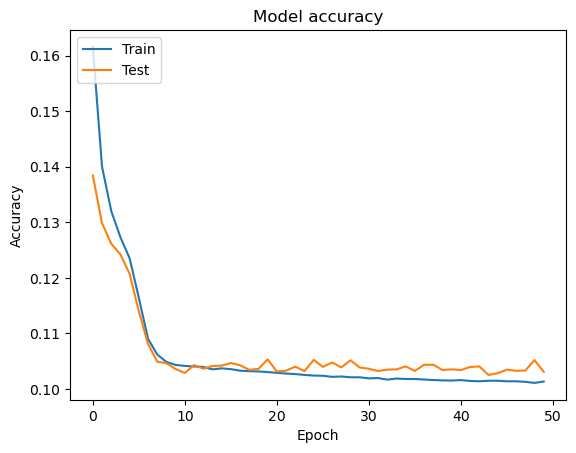

In [115]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [116]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(scale.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 0, 1, 0]])))
print(new_prediction)
new_prediction = (new_prediction > 0.5 )
print(new_prediction)

1/1 [==============================] - 0s 40ms/step
[[0.99997956]]
[[ True]]


c:\Minicoda 3\envs\jcopml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [117]:
x_train.min(), y_train.max()
x_test.min(), y_test.max()

(-3.1252884499371376, 1)

In [118]:
# normalize data by diving 0 & 1 
x_train_norm = x_train / 1
x_test_norm = x_test / 1
y_train_norm = y_train / 1
y_test_norm = y_test / 1

x_train_norm.min(), x_test_norm.max()
y_train_norm.min(), y_test_norm.max()

(0.0, 1.0)

In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Load and preprocess your data (assuming x_train and y_train are your original data)
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

# Create a new model
model_norm = keras.Sequential([
    Dense(6, input_shape=(13,), activation='relu'),
    Dense(6, activation='relu'),
    # Dense(1, activation='sigmoid')
    Dense(1)
])

# Define optimizer and compile the model
EPOCHS = 50
optimizer = Adam(learning_rate=1e-3)
model_norm.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history_norm = model_norm.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=EPOCHS, batch_size=10)

Epoch 1/50
900/900 [==============================] - 2s 1ms/step - loss: 0.2032 - accuracy: 0.7632 - val_loss: 0.1456 - val_accuracy: 0.8100
Epoch 2/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1463 - accuracy: 0.8050 - val_loss: 0.1300 - val_accuracy: 0.8240
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1354 - accuracy: 0.8170 - val_loss: 0.1252 - val_accuracy: 0.8320
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1286 - accuracy: 0.8247 - val_loss: 0.1180 - val_accuracy: 0.8410
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1215 - accuracy: 0.8354 - val_loss: 0.1100 - val_accuracy: 0.8530
Epoch 6/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1165 - accuracy: 0.8429 - val_loss: 0.1070 - val_accuracy: 0.8510
Epoch 7/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1146 - accuracy: 0.8442 - val_loss: 0.1064 - val_accuracy: 0.8580
Epoch 

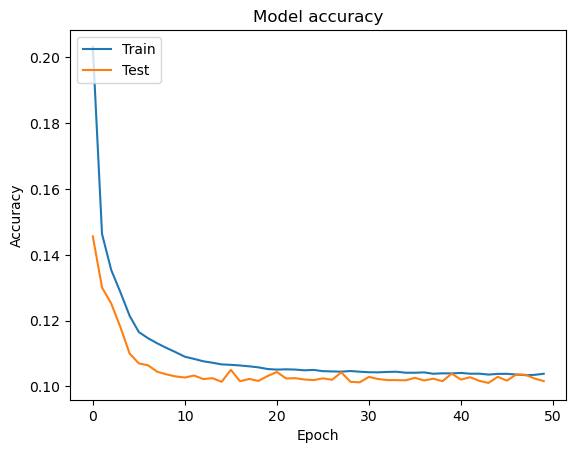

In [125]:
import matplotlib.pyplot as plt
plt.plot(history_norm.history['loss'])
plt.plot(history_norm.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [121]:
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train_norm)
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_norm)

print("Training Accuracy :", train_accuracy)
print("Testing Accuracy :", test_accuracy)


32/32 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.8540
Training Accuracy : 0.8657777905464172
Testing Accuracy : 0.8539999723434448


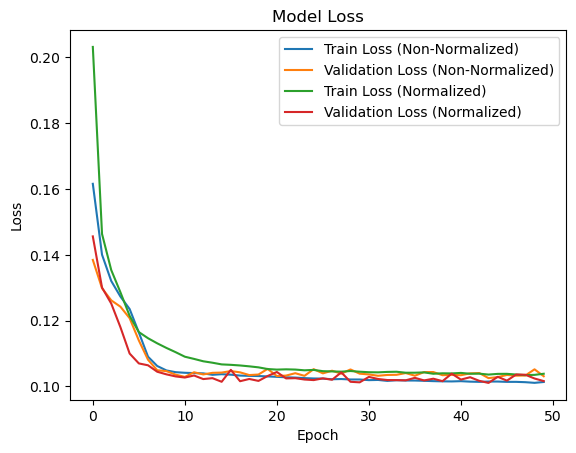

In [124]:
import matplotlib.pyplot as plt

# Plot loss dari history
plt.plot(history.history['loss'], label='Train Loss (Non-Normalized)')
plt.plot(history.history['val_loss'], label='Validation Loss (Non-Normalized)')

# Plot loss dari history_norm
plt.plot(history_norm.history['loss'], label='Train Loss (Normalized)')
plt.plot(history_norm.history['val_loss'], label='Validation Loss (Normalized)')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
